In [22]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [23]:
# Upload Dataset into the notebook
crime=pd.read_csv("D:\CSV FIles Path\Assignments\Clustering\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Perform EDA

In [24]:
# Renaming a blank Column Head
crime.rename(columns={"Unnamed: 0":'States'}, inplace=True)
crime.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [25]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [26]:
# Conveterting datatype Object to Category 
crime['States']=crime['States'].astype("category")
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   States    50 non-null     category
 1   Murder    50 non-null     float64 
 2   Assault   50 non-null     int64   
 3   UrbanPop  50 non-null     int64   
 4   Rape      50 non-null     float64 
dtypes: category(1), float64(2), int64(2)
memory usage: 4.2 KB


In [27]:
# check the no. of rows and Column
crime.shape

(50, 5)

In [28]:
# Define Normalisation Function for scaling
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [29]:
x=norm_func(crime.iloc[:,1:])
x

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820
5,0.025715,0.398859,0.860809,1.864967
6,-1.030419,-0.729082,0.791723,-1.081741
7,-0.433474,0.806838,0.446294,-0.579946
8,1.747671,1.970778,0.998980,1.138967
9,2.206860,0.482855,-0.382735,0.487702


In [30]:
# Standardised Scaler. Standarisation means centering the variable at zero. z=(x-x_mean)/std function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime = scaler.fit_transform(crime.iloc[:,1:])

In [31]:
scaled_crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## Apply ELBOW METHOD TO FIND K VALUE

In [32]:
# Find optimum number of  cluster.(ELBOW METHOD). WCSS Means  within-cluster sum-of-squares.

wcss = [] # [] means We are creating LIST to store Cluster values.
for i in range(1, 11): #We are creating upto K=10 values (11-1)
    kmeans = KMeans(n_clusters=i,random_state=0) 
    kmeans.fit(scaled_crime) # We are fitingt K values
    wcss.append(kmeans.inertia_) # We are calculating average distance within a Cluster and Append that to our LIST wcss

C:\Users\Danny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Plotting the K Mean Cluster for Visualization

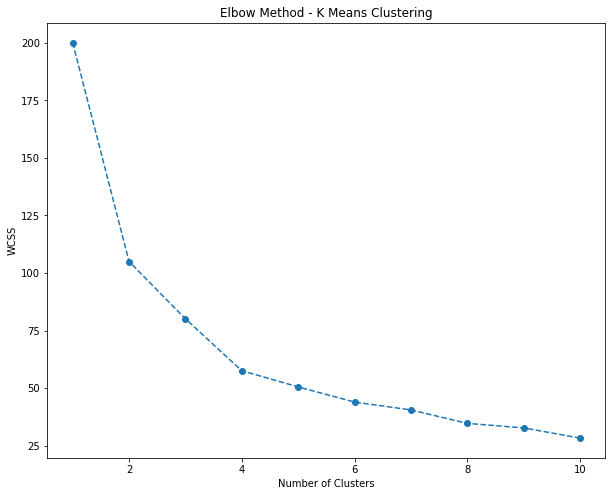

In [33]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss, marker ='o',linestyle = '--')
plt.title('Elbow Method - K Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

 ## Build K MEANS Cluster algorithm. K = 4

In [34]:
from sklearn.cluster import KMeans
crime_cluster = KMeans(n_clusters=4,random_state=42)
crime_cluster.fit_predict(scaled_crime)
# 4 Means: we have taken K=4 as our clusters based on above visualisation.
# Random_state=42, means we are randomly dividing the entire data into 42 rows for the initial Centroid
crime_cluster.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

## Add Cluster to the Original Dataset

In [35]:
crime['Cluster_id'] = crime_cluster.labels_
crime

,States,Murder,Assault,UrbanPop,Rape,Cluster_id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


## Calculate the Centroids of each Clusters

In [36]:
crime_cluster.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [38]:
# Value counts under Each Cluster
crime['Cluster_id'].value_counts()

0    16
2    13
3    13
1     8
Name: Cluster_id, dtype: int64

## Average of each features within their Cluster

In [40]:
crime.groupby('Cluster_id').agg(['mean']).T

,Cluster_id,0,1,2,3
Murder,mean,5.65625,13.9375,10.815385,3.600000
Assault,mean,138.87500,243.6250,257.384615,78.538462
UrbanPop,mean,73.87500,53.7500,76.000000,52.076923
Rape,mean,18.78125,21.4125,33.192308,12.176923


## Visualization of Clusters with their Centriods

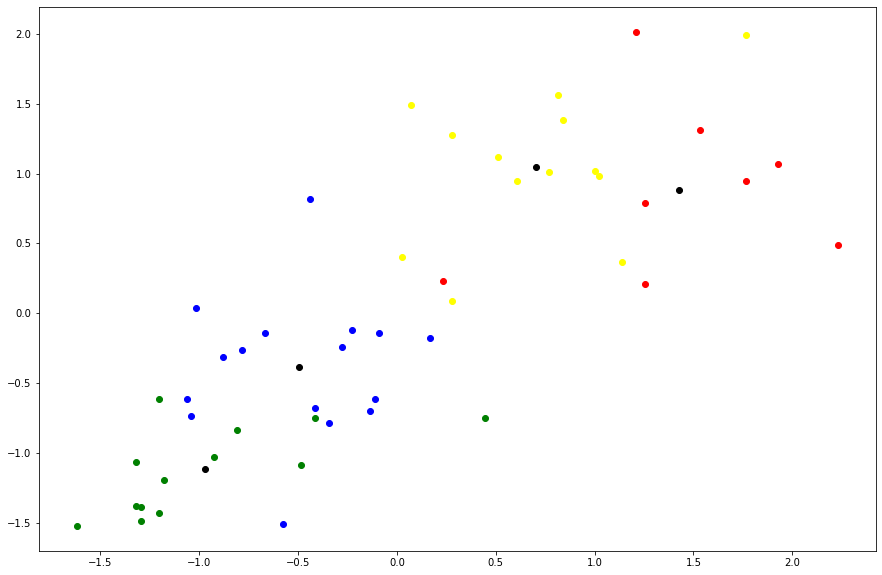

In [43]:
plt.figure(figsize=(15,10))
plt.scatter(scaled_crime[crime_cluster.labels_ == 0,0], scaled_crime[crime_cluster.labels_ == 0,1], c = 'blue')
plt.scatter(scaled_crime[crime_cluster.labels_ == 1,0], scaled_crime[crime_cluster.labels_ == 1,1], c = 'red')
plt.scatter(scaled_crime[crime_cluster.labels_ == 2,0], scaled_crime[crime_cluster.labels_ == 2,1], c = 'yellow')
plt.scatter(scaled_crime[crime_cluster.labels_ == 3,0], scaled_crime[crime_cluster.labels_ == 3,1], c = 'green')
#plt.scatter(scaled_crime[crime_cluster.labels_ == 4,0], scaled_crime[crime_cluster.labels_ == 4,1], c = 'purple')

plt.scatter(crime_cluster.cluster_centers_[:,0], crime_cluster.cluster_centers_[:,1], c = 'black', label = 'Centroids')
plt.show()


In [52]:
# Adding a Total_crime col to see the relationship with the cluster
crime["Total_Crime"] = crime.Murder + crime.Assault + crime.Rape
crime

,States,Murder,Assault,UrbanPop,Rape,Total_Crime,Cluster ID
0,Alabama,13.2,236,58,21.2,270.4,1
1,Alaska,10.0,263,48,44.5,317.5,2
2,Arizona,8.1,294,80,31.0,333.1,2
3,Arkansas,8.8,190,50,19.5,218.3,1
4,California,9.0,276,91,40.6,325.6,2
5,Colorado,7.9,204,78,38.7,250.6,2
6,Connecticut,3.3,110,77,11.1,124.4,0
7,Delaware,5.9,238,72,15.8,259.7,0
8,Florida,15.4,335,80,31.9,382.3,2
9,Georgia,17.4,211,60,25.8,254.2,1


In [46]:
# shift column 'Cluster ID' to last position
#last_column = crime.pop('Cluster_id')

In [47]:
# insert column using insert(position,column_name,last_column) function
#crime.insert(6, 'Cluster ID', last_column)

In [54]:
crime=crime.rename({'Cluster ID':'Cluster_id'}, axis=1)

In [55]:
crime

,States,Murder,Assault,UrbanPop,Rape,Total_Crime,Cluster_id
0,Alabama,13.2,236,58,21.2,270.4,1
1,Alaska,10.0,263,48,44.5,317.5,2
2,Arizona,8.1,294,80,31.0,333.1,2
3,Arkansas,8.8,190,50,19.5,218.3,1
4,California,9.0,276,91,40.6,325.6,2
5,Colorado,7.9,204,78,38.7,250.6,2
6,Connecticut,3.3,110,77,11.1,124.4,0
7,Delaware,5.9,238,72,15.8,259.7,0
8,Florida,15.4,335,80,31.9,382.3,2
9,Georgia,17.4,211,60,25.8,254.2,1


## Visualising 2 Features for Inferences. STATES VS Total_Crime

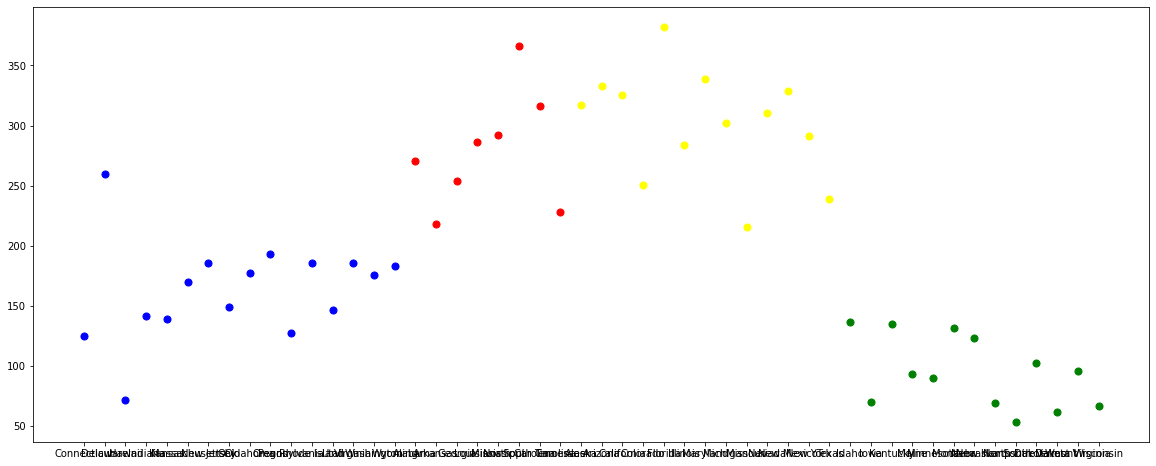

In [63]:
plt.rcParams["figure.figsize"] = (20,8)
plot0 = crime[crime.Cluster_id==0]
plot1 = crime[crime.Cluster_id==1]
plot2 = crime[crime.Cluster_id==2]
plot3 = crime[crime.Cluster_id==3]

plt.scatter(plot0.States, plot0.Total_Crime,s=50, color="blue")
plt.scatter(plot1.States, plot1.Total_Crime,s=50, color="red")
plt.scatter(plot2.States, plot2.Total_Crime,s=50, color="yellow")
plt.scatter(plot3.States, plot3.Total_Crime,s=50, color="green")
plt.show()


## Visualising URBAN POPULATION VS Total_Crime

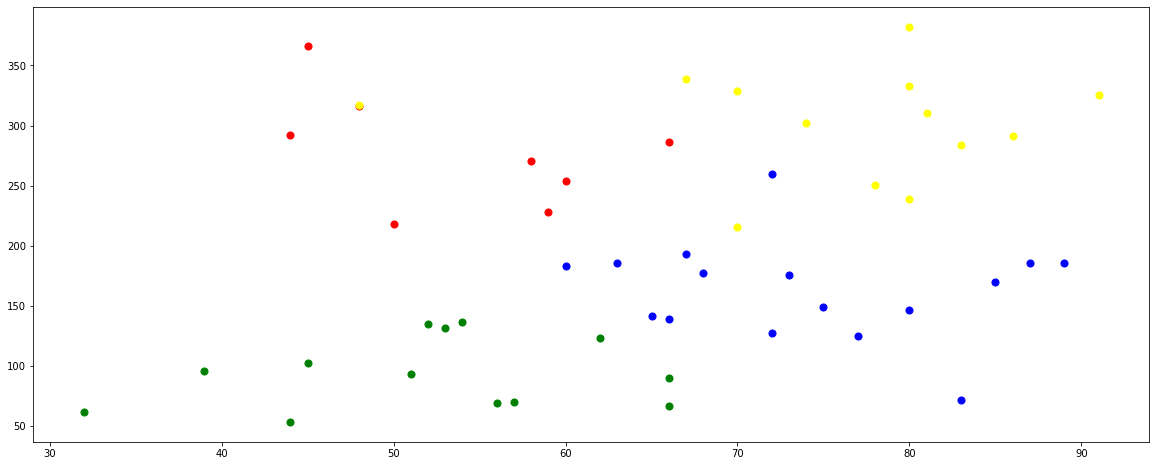

In [64]:
plt.rcParams["figure.figsize"] = (20,8)
plot0 = crime[crime.Cluster_id==0]
plot1 = crime[crime.Cluster_id==1]
plot2 = crime[crime.Cluster_id==2]
plot3 = crime[crime.Cluster_id==3]

plt.scatter(plot0.UrbanPop, plot0.Total_Crime,s=50, color="blue")
plt.scatter(plot1.UrbanPop, plot1.Total_Crime,s=50, color="red")
plt.scatter(plot2.UrbanPop, plot2.Total_Crime,s=50, color="yellow")
plt.scatter(plot3.UrbanPop, plot3.Total_Crime,s=50, color="green")
plt.show()

### Plotting Clusters for VISUALIZATION

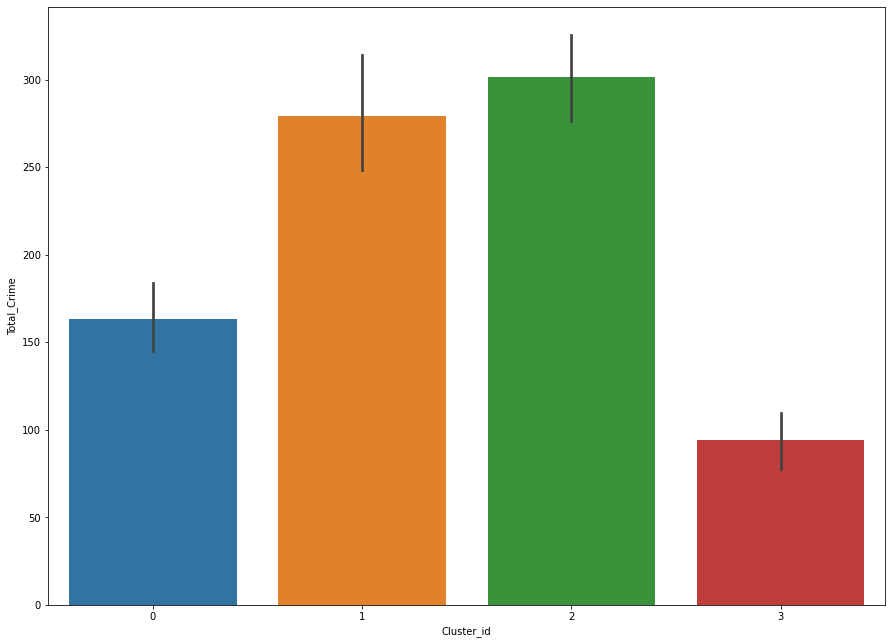

In [102]:
f, ax = plt.subplots(figsize=(15,11))
sns.barplot(x='Cluster_id', y="Total_Crime", data=crime);

### Above Bar Graph shows that the Crime Rate is high in Cluster 1 and 2.

In [74]:
# Checking total Crime for Cluster 2 in desending Order
crime[crime['Cluster_id']==2].sort_values("Total_Crime",ascending=False)

,States,Murder,Assault,UrbanPop,Rape,Total_Crime,Cluster_id
8,Florida,15.4,335,80,31.9,382.3,2
19,Maryland,11.3,300,67,27.8,339.1,2
2,Arizona,8.1,294,80,31.0,333.1,2
30,New Mexico,11.4,285,70,32.1,328.5,2
4,California,9.0,276,91,40.6,325.6,2
1,Alaska,10.0,263,48,44.5,317.5,2
27,Nevada,12.2,252,81,46.0,310.2,2
21,Michigan,12.1,255,74,35.1,302.2,2
31,New York,11.1,254,86,26.1,291.2,2
12,Illinois,10.4,249,83,24.0,283.4,2


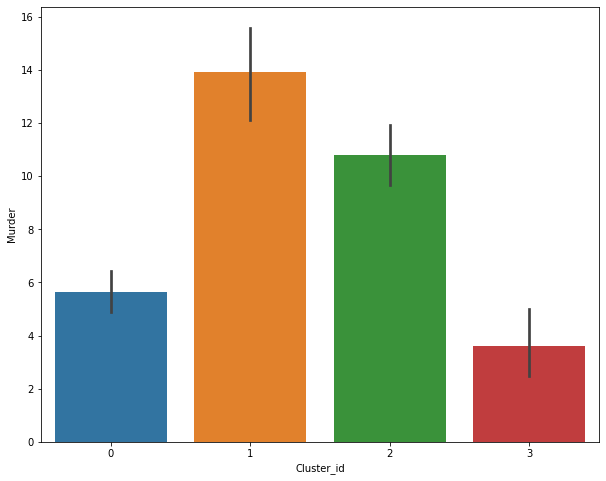

In [75]:
# Lets Plot Murder VS Cluster ID to Visualise
f, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='Cluster_id', y="Murder",  data=crime);

### Murder rate are High in Above States falling Cluster 1

In [95]:
# Checking States falling in Cluster 1 in desending Order
crime[crime['Cluster_id']==1].sort_values("Murder",ascending=False)

,States,Murder,Assault,UrbanPop,Rape,Total_Crime,Cluster_id
9,Georgia,17.4,211,60,25.8,254.2,1
23,Mississippi,16.1,259,44,17.1,292.2,1
17,Louisiana,15.4,249,66,22.2,286.6,1
39,South Carolina,14.4,279,48,22.5,315.9,1
0,Alabama,13.2,236,58,21.2,270.4,1
41,Tennessee,13.2,188,59,26.9,228.1,1
32,North Carolina,13.0,337,45,16.1,366.1,1
3,Arkansas,8.8,190,50,19.5,218.3,1


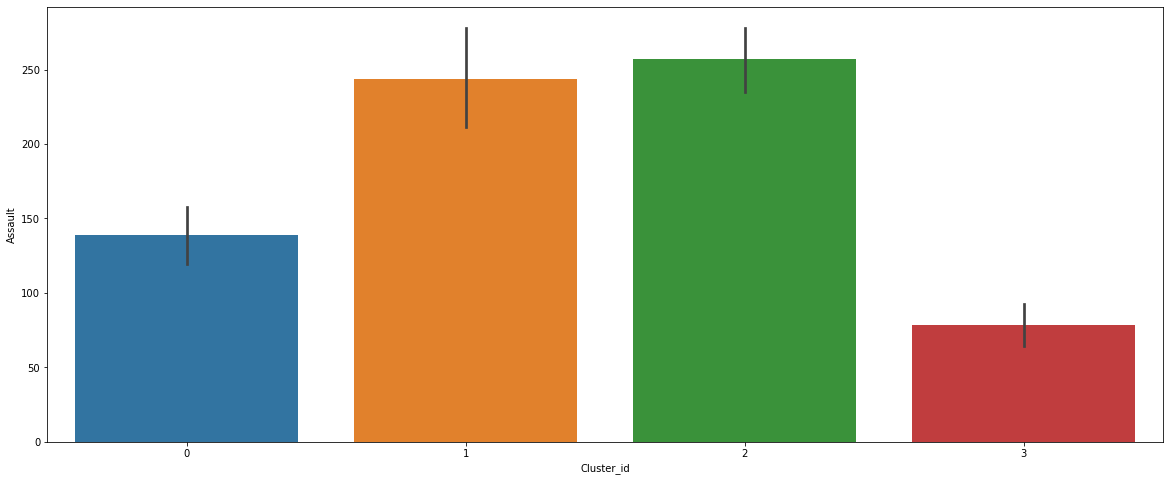

In [98]:
# Lets Plot Assault VS Cluster ID to Visualise
sns.barplot(x="Cluster_id", y="Assault", data=crime);

### Assault rate are above average in States falling under Cluster no 0

In [97]:
# Checking STates for Cluster 0 in desending Order
crime[crime['Cluster_id']==0].sort_values("Assault",ascending=False)

,States,Murder,Assault,UrbanPop,Rape,Total_Crime,Cluster_id
7,Delaware,5.9,238,72,15.8,259.7,0
38,Rhode Island,3.4,174,87,8.3,185.7,0
49,Wyoming,6.8,161,60,15.6,183.4,0
29,New Jersey,7.4,159,89,18.8,185.2,0
36,Oregon,4.9,159,67,29.3,193.2,0
45,Virginia,8.5,156,63,20.7,185.2,0
35,Oklahoma,6.6,151,68,20.0,177.6,0
20,Massachusetts,4.4,149,85,16.3,169.7,0
46,Washington,4.0,145,73,26.2,175.2,0
34,Ohio,7.3,120,75,21.4,148.7,0
